In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
train.Age.unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [11]:
train.VIP.unique()

array([False, True, nan], dtype=object)

In [12]:
train.FoodCourt.value_counts()

0.0       5456
1.0        116
2.0         75
4.0         53
3.0         53
          ... 
3206.0       1
3879.0       1
734.0        1
4076.0       1
2325.0       1
Name: FoodCourt, Length: 1507, dtype: int64

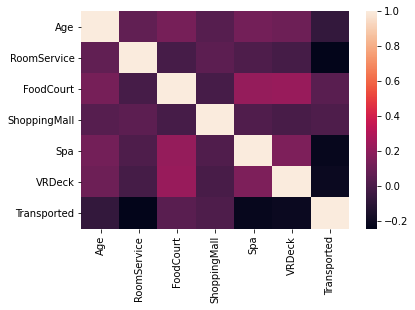

In [13]:
sns.heatmap(train.corr())

In [14]:
data_all = pd.concat([train, test],sort= False)
data_all.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)
data_all.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [15]:
data_all.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [16]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [17]:
data_all.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [18]:
data_all['HomePlanet'].fillna(st.mode(data_all['HomePlanet']), inplace=True)

In [19]:
data_all['CryoSleep'].fillna(st.mode(data_all['CryoSleep']), inplace=True)

In [20]:
data_all['Destination'].fillna(st.mode(data_all['Destination']), inplace=True)

In [21]:
data_all['Age'].fillna(np.mean(data_all['Age']), inplace=True)

In [22]:
data_all['RoomService'].fillna(np.mean(data_all['RoomService']), inplace=True)

In [23]:
data_all['FoodCourt'].fillna(np.mean(data_all['FoodCourt']), inplace=True)

In [24]:
data_all['ShoppingMall'].fillna(np.mean(data_all['ShoppingMall']), inplace=True)

In [25]:
data_all['Spa'].fillna(np.mean(data_all['Spa']), inplace=True)

In [26]:
data_all['VRDeck'].fillna(np.mean(data_all['VRDeck']), inplace=True)

In [27]:
data_all['VIP'].fillna(st.mode(data_all['VIP']), inplace=True)

In [28]:
data_all.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
dtype: int64

In [29]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(3)
memory usage: 1.0+ MB


In [30]:
data_all.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [31]:
data_all.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [32]:
data_all['CryoSleep'].replace([False,True],[0,1],inplace=True)


data_all['Destination'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'],[0,1,2],inplace=True)


data_all['VIP'].replace([False,True],[0,1],inplace=True)


data_all['Transported'].replace([False,True],[0,1],inplace=True)


data_all['HomePlanet'].replace(['Earth','Europa','Mars'],[0,1,2],inplace=True)

In [33]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  int64  
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  int64  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 1.2 MB


In [34]:
data_all[~data_all['Transported'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,0,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,1,0,1,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0.0


In [35]:
data_train = data_all[~data_all['Transported'].isnull()]

In [36]:
data_test = data_all[data_all['Transported'].isnull()]

In [62]:
y_train = data_train['Transported']
X_train = data_train.drop(['Transported'],axis=1)

In [65]:
y_train[y_train==False]=0
y_train[y_train==True]=1

<ipython-input-65-3ffd48839b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train==False]=0
C:\Users\Ishani\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-65-3ffd48839b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train==True]=1


In [67]:
X_test = data_test

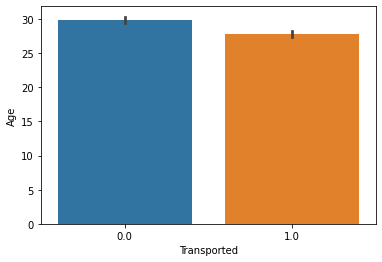

In [68]:
sns.barplot(y_train,X_train.Age)

In [69]:
from sklearn.neural_network import MLPClassifier

In [90]:
nnmodel = MLPClassifier(hidden_layer_sizes=(100,100,100), activation= 'tanh',
                        solver='adam', alpha=0.001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001,
                        max_iter=250, shuffle=True, random_state=None, tol=0.0001,
                        verbose=1, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                        early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                        beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [93]:
nnmodel.fit(X_train, y_train)

Iteration 1, loss = 0.52953114
Iteration 2, loss = 0.48997942
Iteration 3, loss = 0.48374038
Iteration 4, loss = 0.47663893
Iteration 5, loss = 0.47137098
Iteration 6, loss = 0.47145650
Iteration 7, loss = 0.47310055
Iteration 8, loss = 0.46634830
Iteration 9, loss = 0.46897080
Iteration 10, loss = 0.47055629
Iteration 11, loss = 0.46524524
Iteration 12, loss = 0.46247669
Iteration 13, loss = 0.46187940
Iteration 14, loss = 0.45733380
Iteration 15, loss = 0.45637688
Iteration 16, loss = 0.45883176
Iteration 17, loss = 0.45297954
Iteration 18, loss = 0.45389554
Iteration 19, loss = 0.45106979
Iteration 20, loss = 0.44908027
Iteration 21, loss = 0.44971920
Iteration 22, loss = 0.44917863
Iteration 23, loss = 0.44617552
Iteration 24, loss = 0.44744202
Iteration 25, loss = 0.44893914
Iteration 26, loss = 0.44986248
Iteration 27, loss = 0.44179939
Iteration 28, loss = 0.44173272
Iteration 29, loss = 0.44357562
Iteration 30, loss = 0.44349112
Iteration 31, loss = 0.44057712
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.001,
              hidden_layer_sizes=(100, 100, 100), max_iter=250, verbose=1)

In [91]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

#Initiate K-Fold with 4 Folds
kf = KFold(n_splits=4, shuffle=True, random_state=10)
#Initiate logistic regression model
logistic_model = LogisticRegression()
#Obtain CV results with 
cv_results = cross_val_score(nnmodel, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross validation Accuracy scores for each fold = ", cv_results)
print("Mean CV Accuracy = ", np.mean(cv_results))

Iteration 1, loss = 0.53775323
Iteration 2, loss = 0.50016745
Iteration 3, loss = 0.48894831
Iteration 4, loss = 0.47796980
Iteration 5, loss = 0.47148226
Iteration 6, loss = 0.47560910
Iteration 7, loss = 0.46808697
Iteration 8, loss = 0.46434663
Iteration 9, loss = 0.45881299
Iteration 10, loss = 0.45901154
Iteration 11, loss = 0.45606841
Iteration 12, loss = 0.45788319
Iteration 13, loss = 0.45309654
Iteration 14, loss = 0.45517873
Iteration 15, loss = 0.44999892
Iteration 16, loss = 0.45156987
Iteration 17, loss = 0.45284371
Iteration 18, loss = 0.45036388
Iteration 19, loss = 0.44676021
Iteration 20, loss = 0.44559469
Iteration 21, loss = 0.44143780
Iteration 22, loss = 0.44160177
Iteration 23, loss = 0.44255084
Iteration 24, loss = 0.43861172
Iteration 25, loss = 0.43880380
Iteration 26, loss = 0.43999276
Iteration 27, loss = 0.43461531
Iteration 28, loss = 0.43607578
Iteration 29, loss = 0.43038900
Iteration 30, loss = 0.43271501
Iteration 31, loss = 0.43634857
Iteration 32, los

Iteration 66, loss = 0.40441015
Iteration 67, loss = 0.40315429
Iteration 68, loss = 0.41095744
Iteration 69, loss = 0.41056870
Iteration 70, loss = 0.40939924
Iteration 71, loss = 0.41920524
Iteration 72, loss = 0.40988511
Iteration 73, loss = 0.41440621
Iteration 74, loss = 0.41029218
Iteration 75, loss = 0.40984140
Iteration 76, loss = 0.40940578
Iteration 77, loss = 0.40952460
Iteration 78, loss = 0.40645260
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54445757
Iteration 2, loss = 0.50643042
Iteration 3, loss = 0.49767636
Iteration 4, loss = 0.48686334
Iteration 5, loss = 0.47891063
Iteration 6, loss = 0.48310085
Iteration 7, loss = 0.47635869
Iteration 8, loss = 0.47422747
Iteration 9, loss = 0.47454203
Iteration 10, loss = 0.47152708
Iteration 11, loss = 0.47383535
Iteration 12, loss = 0.46960609
Iteration 13, loss = 0.46891760
Iteration 14, loss = 0.46854808
Iteration 15, loss = 0.47539227
Iteration 16, loss = 0.

In [94]:
y_pred = nnmodel.predict(X_test)

In [89]:
X_test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [95]:
result = pd.DataFrame(y_pred).astype(int)

result.columns = ['Transported']

In [96]:
result['Transported'].replace([0,1],[False,True],inplace=True)

In [97]:
submit = pd.concat([test['PassengerId'], result],axis=1)

In [98]:
submit.to_csv('submit.csv', index=False)